
# CLASSIFICATION

**Data Description**: The provided data is a modified version of a publicly available data source, and is subject to copyright.

**Domain**: Healthcare.

**Donor of database**: The Johns Hopkins University, Johns Hopkins Road, Laurel, MD 20707, (301) 953-6231.

**Licence agreement**: The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.

**Attribute Information**

* **`PRG`**: Plasma glucose. 
* **`PL`**: Blood Work Result-1 (mu U/ml).
* **`PR`** : Blood Pressure (mm Hg). 
* **`SK`**: Blood Work Result-2 (mm).
* **`TS`**: Blood Work Result-3 (mu U/ml).
* **`M11`**: Body mass index (weight in kg/(height in m)^2.
* **`BD2`**: Blood Work Result-4 (mu U/ml).
* **`Age`**: Patients Age  (years).
* **`Insurance`**: If a patient holds a valid insurance card.
* **`Sepssis`**: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise.

**Objectives**
* Data Collection.
* Data Preparation.
* Exploratory Data Analysis.
* Model Building Process:
    * Logistic Regression.
    * Decision Tree.
    * Bagging Decision Tree.
    * Random Forest.
* Optimization
* Model Evaluation.

In [173]:
# important packages - numpy, matplotlib, pandas, seaborn etc.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# train-test-split
from sklearn.model_selection import train_test_split

# oversampplingw with SMOTE technique.
from imblearn.over_sampling import SMOTE

# feature scalling
from sklearn import preprocessing

# kfold crossvalidation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# optimiztion - hyperparameter tuning, regularization, kfold cross validation
from sklearn.model_selection import GridSearchCV

# model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# model validation
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [174]:
# function to plot a learning curve 
def train_and_plot(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))

    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', auc.round(3))

    # ROC Curve
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize = (12.8 , 6))
    plt.plot(fpr, tpr, label = 'AUC = {})'.\
             format(model_roc_auc.round(4)))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return model

## Data Collection

In [175]:
df = pd.read_csv('Paitients_Files_Train.csv')

In [176]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Exploratory Data Analysis  

### Data Exploration

In [177]:
# checking if any NaN values in the data frame. >> Our data is clean. 
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [178]:
# checking if any descriptive values is invalid or being an outliner
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [179]:
df.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [180]:
df.shape

(599, 11)

### Data Visualization 

<Axes: >

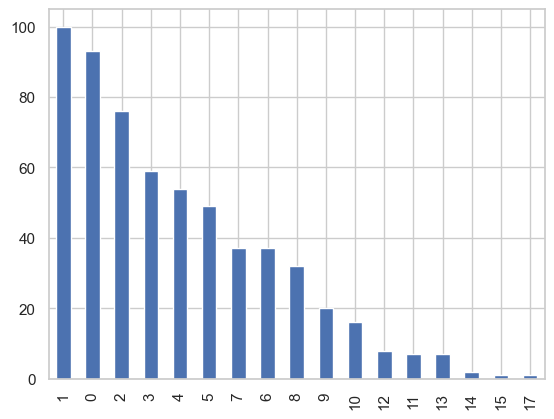

In [181]:
#  Plasma glucose
df['PRG'].value_counts().plot(kind='bar')

<Axes: >

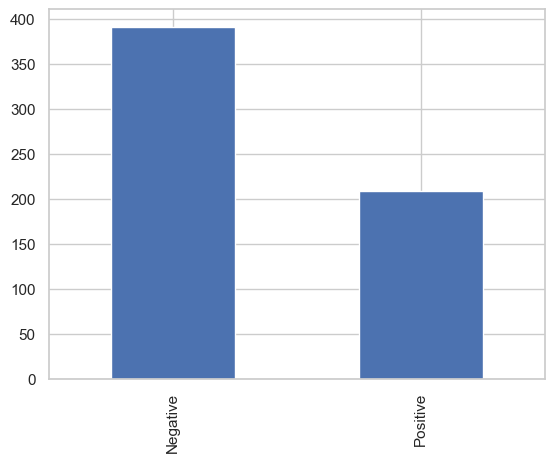

In [182]:
# >> imbalanced dataset 
df['Sepssis'].value_counts().plot(kind='bar')

<Figure size 6400x6400 with 0 Axes>

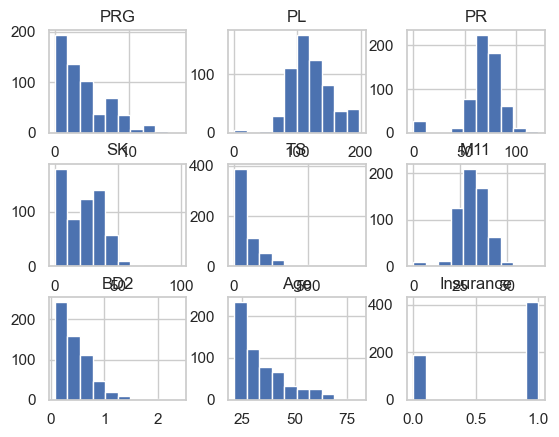

In [183]:
# >> the dataset column is skewed so choose minmaxscaler.
plt.figure(figsize=(40, 40), dpi=160)
df.hist()
plt.show()

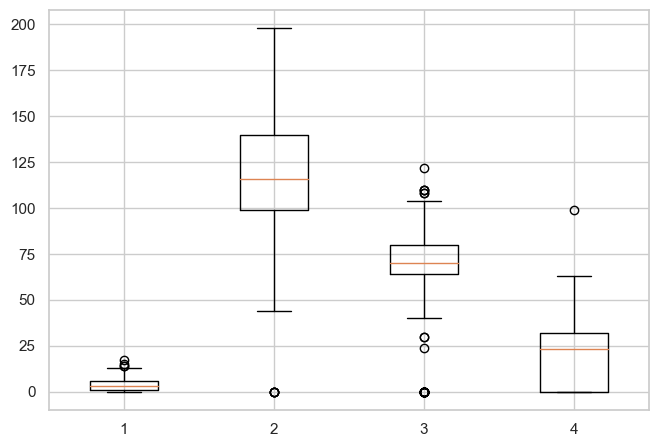

In [184]:
fig = plt.figure(figsize =(6, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])


# Creating plot
bp = ax.boxplot(df. iloc[:, [1,2,3,4]])

 
# show plot
plt.show()

<Axes: xlabel='PRG', ylabel='PL'>

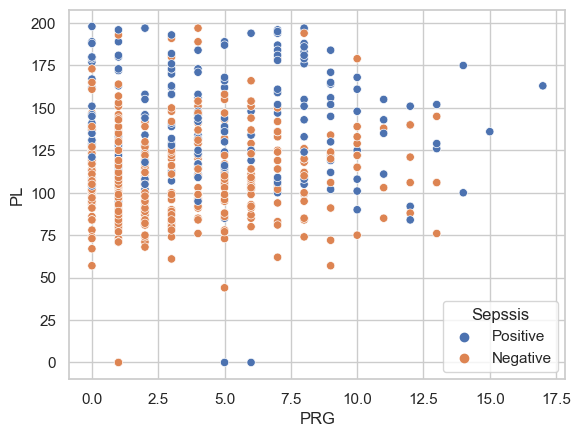

In [185]:
sns.scatterplot(x="PRG", y="PL", data=df, hue='Sepssis')

<Axes: xlabel='M11', ylabel='PR'>

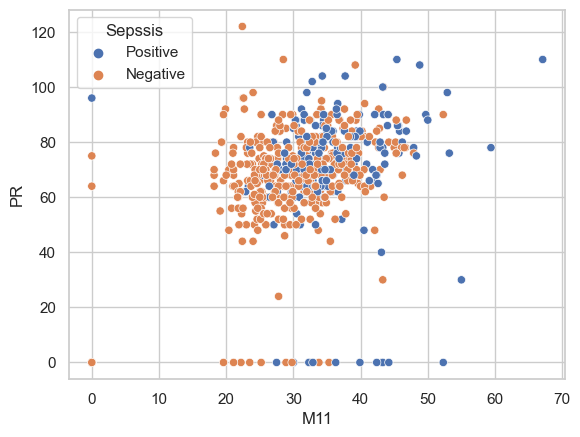

In [186]:
sns.scatterplot(x="M11", y="PR", data=df, hue='Sepssis')

<Axes: xlabel='BD2', ylabel='Age'>

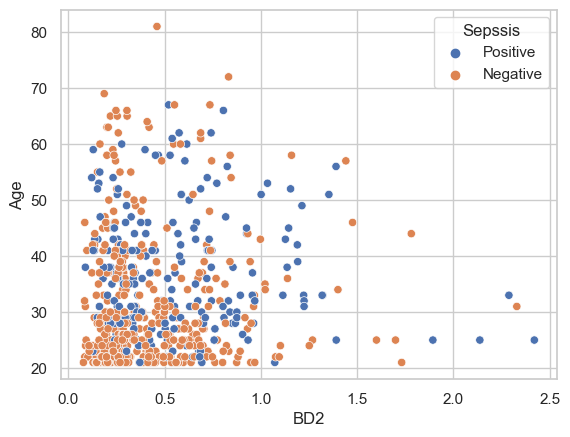

In [187]:
sns.scatterplot(x="BD2", y="Age", data=df, hue='Sepssis')

<Axes: xlabel='PRG', ylabel='PL'>

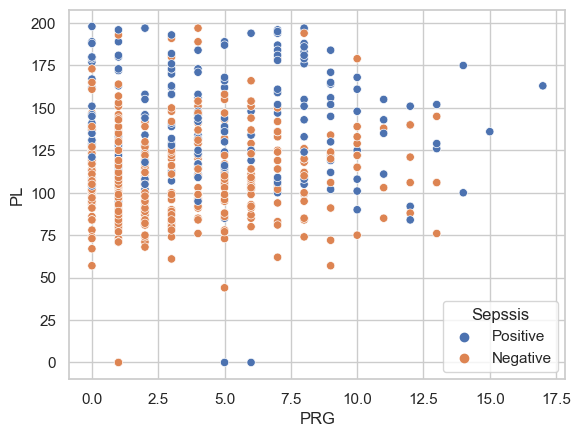

In [188]:
sns.scatterplot(x="PRG", y="PL", data=df, hue='Sepssis')

/var/folders/g2/tz8mrjyx0bd21mkwkqx_jn840000gn/T/ipykernel_6037/574227746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop('Sepssis', axis = 1).corr()


Text(0.5, 1.0, 'Correlation Matrix of Data')

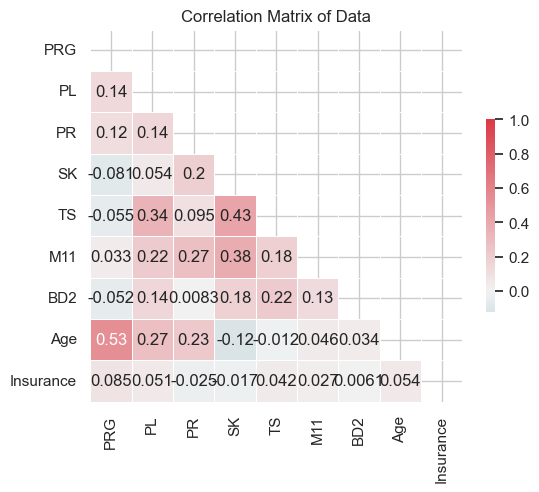

In [189]:
corr = df.drop('Sepssis', axis = 1).corr()

mask = np.zeros_like(corr, dtype =bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (6, 5))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [190]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

PRG  Age    0.532545
Age  PRG    0.532545
dtype: float64

### Feature Engineering 

In [191]:
# changing the positive/negative values to zero and one. 
# where 1 is positive and 0 is negative. 

df['Sepssis'] = df['Sepssis'].map({'Negative':0,'Positive':1})

In [192]:
# drop the ID and Insurance columns out of the dataset.
# >> the ID is only the counter not the feature including it, might lead to the leakage problem. 
# >> even though the Insurrance column is a feature but it doesn't not help to build better model. 

df = df.drop(['ID', 'Insurance'], axis=1)
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Extracting X and y

In [193]:
#split dataset in features and target variable
X = df.drop(['Sepssis'], axis = 1)
y = df.Sepssis

### Feature Scaling

In [194]:
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)

### Data Preprocession - SMOTE Oversampling

In [195]:
# oversampling - SMOTE technique. 
sm = SMOTE()

# transforming the X and y. 
X_sm, y_sm = sm.fit_resample(X, y)

# now the number of sample in both class 1 and class 0 are equal to 391 in X_sm and y_sm
# >> 391 + 391 = 782
X_sm.shape, y_sm.shape

((782, 8), (782,))

### Train/Test Split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1) 

### MODEL 1: Logistic Regression With Hyperparameter Tuning

In [197]:
# optimizing the train dataset 
X = X_train
y= y_train

# choose model 
model = LogisticRegression()

# choose hyperparameter
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# set up grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=rskf, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

# show results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.732392 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.703024 (0.070184) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.703024 (0.070184) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.703024 (0.070184) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.703024 (0.070184) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.703024 (0.070184) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.703024 (0.070184) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.704066 (0.068772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704066 (0.068772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.704066 (0.068772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.704133 (0.064894) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704133 (0.064894) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.711492 (0.066436) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.706183 (0.063122) wi

In [198]:
# Best: 0.732392 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# Instruction: everytime the best conditions like C or solver might be change due to the random state.
# If you see it changes, you can type the best conditions in again to get the best results. Thank you. 

reg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        84
           1       0.73      0.82      0.77        73

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



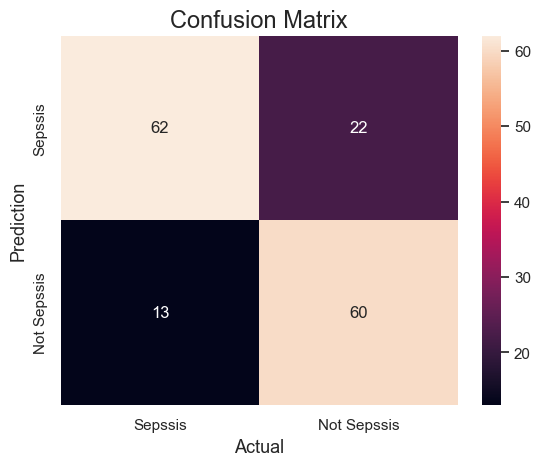

In [199]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Sepssis','Not Sepssis'],
            yticklabels=['Sepssis','Not Sepssis'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Model accuracy for train set: 0.712
Model accuracy for test set: 0.777

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        84
           1       0.73      0.82      0.77        73

    accuracy                           0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157


Confusion Matrix:
 [[62 22]
 [13 60]]

Accuracy Score:  0.777


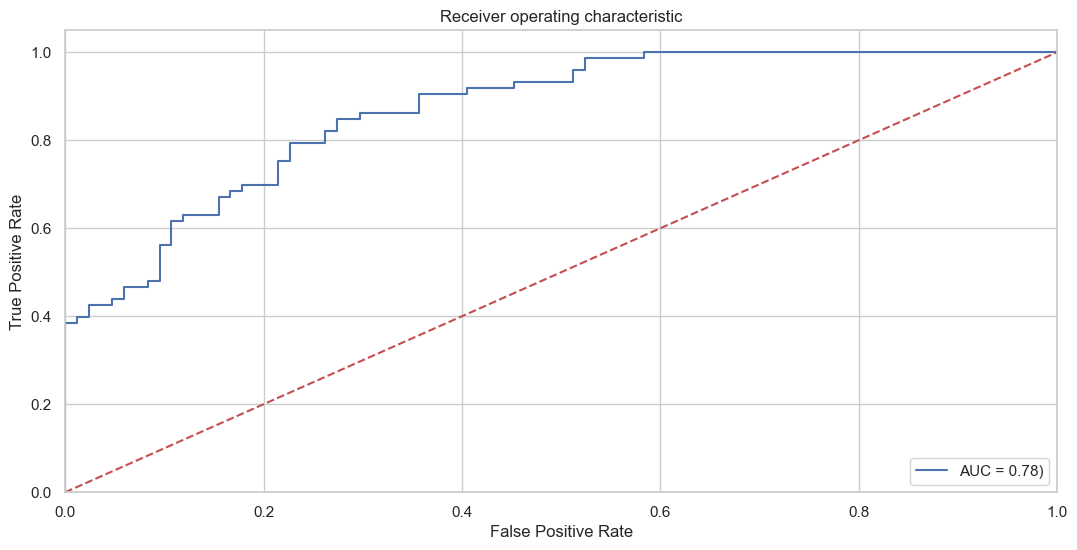

In [200]:
# learning curve 
model1 = train_and_plot(reg, X_train, y_train, X_test, y_test)

### MODEL 2: Decision Tree With Hyperparameter Tuning 

In [201]:
# choose model 
clf = DecisionTreeClassifier()

# choose hyperparameter 
params = { 'criterion':['gini','entropy'],'min_samples_leaf': [1, 2, 3],'max_depth': np.arange(3, 5)}

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


grid = GridSearchCV(estimator=clf, param_grid=params, cv=rskf, n_jobs=1, verbose=2 )


grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Fitting 30 folds for each of 12 candidates, totalling 360 fits
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_

In [211]:
# Best: 0.749360 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

# Instruction: everytime the best conditions like C or solver might be change due to the random state.
# If you see it changes, you can type the best conditions in again to get the best results. Thank you. 

clf = DecisionTreeClassifier(criterion='gini',max_depth=4, min_samples_leaf=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.63      0.74        84
           1       0.68      0.90      0.78        73

    accuracy                           0.76       157
   macro avg       0.78      0.77      0.76       157
weighted avg       0.79      0.76      0.75       157



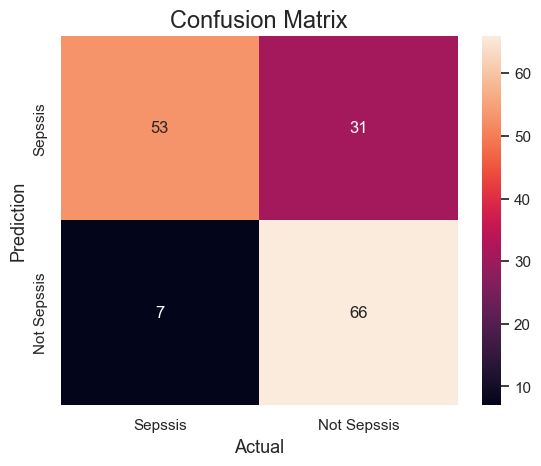

In [212]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Sepssis','Not Sepssis'],
            yticklabels=['Sepssis','Not Sepssis'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Model accuracy for train set: 0.798
Model accuracy for test set: 0.758

              precision    recall  f1-score   support

           0       0.88      0.63      0.74        84
           1       0.68      0.90      0.78        73

    accuracy                           0.76       157
   macro avg       0.78      0.77      0.76       157
weighted avg       0.79      0.76      0.75       157


Confusion Matrix:
 [[53 31]
 [ 7 66]]

Accuracy Score:  0.758


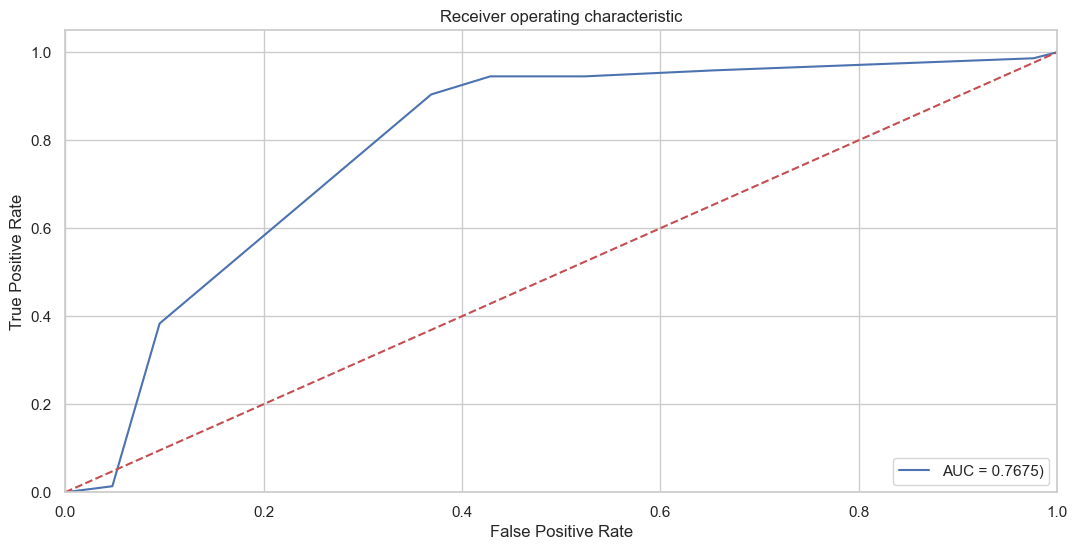

In [213]:
# learning curve 
model1 = train_and_plot(clf, X_train, y_train, X_test, y_test)

### MODEL 3: Bagging Decision Tree with Hyperparameter Tuning 

In [215]:
# optimizing for training data 
X = X_train
y = y_train

# choose model 
model = BaggingClassifier()

# choose hyper parameter 
n_estimators = [10, 100, 1000]

# define grid search

grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866700 using {'n_estimators': 1000}
0.778730 (0.093209) with: {'n_estimators': 10}
0.857426 (0.069525) with: {'n_estimators': 100}
0.866700 (0.072910) with: {'n_estimators': 1000}


In [216]:
# Best: 0.842507 using {'n_estimators': 1000}
# Create Decision Tree classifer object
bag = BaggingClassifier(n_estimators=1000)

# Train Decision Tree Classifer
bag.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = bag.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        84
           1       0.77      0.88      0.82        73

    accuracy                           0.82       157
   macro avg       0.82      0.83      0.82       157
weighted avg       0.83      0.82      0.82       157



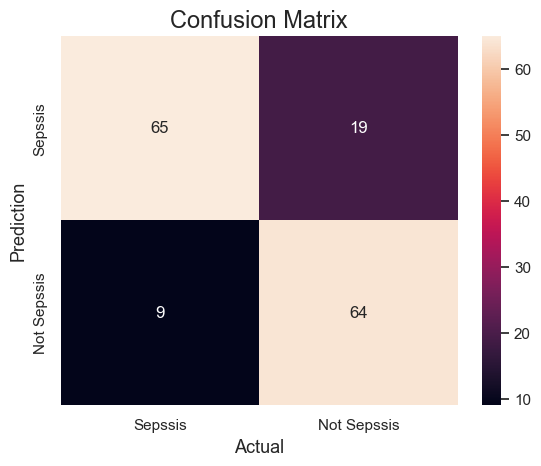

In [217]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Sepssis','Not Sepssis'],
            yticklabels=['Sepssis','Not Sepssis'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Model accuracy for train set: 1.000
Model accuracy for test set: 0.815

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        84
           1       0.76      0.88      0.82        73

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.82      0.82      0.82       157


Confusion Matrix:
 [[64 20]
 [ 9 64]]

Accuracy Score:  0.815


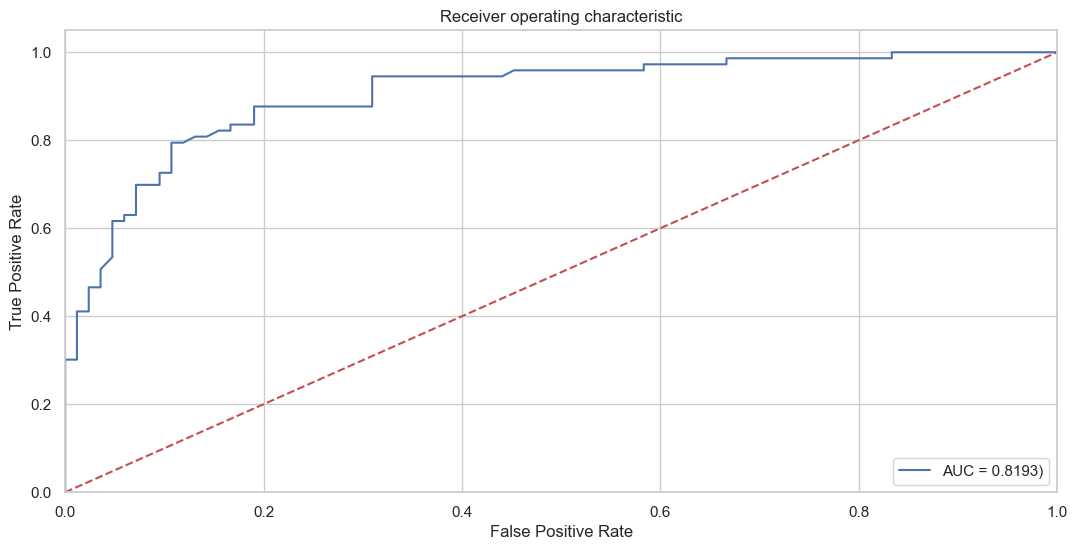

In [218]:
# learning curve 
model1 = train_and_plot(bag, X_train, y_train, X_test, y_test)

### Generating predictions for the Test dataset

In [209]:
# load the actual test data 
df_test = pd.read_csv('Paitients_Files_Test.csv')

In [219]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [220]:
# drop ID and Insurance while predicting
y_test_pred = bag.predict(df_test.drop(['ID', 'Insurance'], axis = 1))

/Users/andtr/Documents/ML Assignments/env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [221]:
# prediction column 
y_test_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [226]:
final_prediction = pd.read_csv('S3878698 predictions.csv')

final_prediction['Sepssis'] = y_test_pred

final_prediction = pd.DataFrame(final_prediction)

final_prediction['Sepssis'] = final_prediction['Sepssis'].map({0:'Negative',1:'Positive'})

final_prediction = final_prediction.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [227]:

final_prediction.head()

,ID\t,Sepssis
0,ICU200609\t\t\t\t\t,Negative
1,ICU200610\t\t\t\t\t,Positive
2,ICU200611\t\t\t\t\t,Positive
3,ICU200612\t\t\t\t\t,Positive
4,ICU200613\t\t\t\t\t,Negative


In [228]:
final_prediction.to_csv('S3878698_predictions.csv')

### MODEL 4: Random Forest with Hyperparameter Tuning 

In [229]:
# optimize training dataset
X = X_sm
y = y_sm

# choose model 
model = RandomForestClassifier()

# choose hyper-parameter
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# set up grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

# show results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880556 using {'max_features': 'log2', 'n_estimators': 1000}
0.777650 (0.060643) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.866902 (0.064738) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.878868 (0.064230) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.792821 (0.054378) with: {'max_features': 'log2', 'n_estimators': 10}
0.866111 (0.061337) with: {'max_features': 'log2', 'n_estimators': 100}
0.880556 (0.060519) with: {'max_features': 'log2', 'n_estimators': 1000}


In [230]:
# Best: 0.845748 using {'max_features': 'log2', 'n_estimators': 1000}

# Instruction: everytime the best conditions like C or solver might be change due to the random state.
# If you see it changes, you can type the best conditions in again to get the best results. Thank you. 

rf = RandomForestClassifier(n_estimators=1000,max_features='log2')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        84
           1       0.78      0.90      0.84        73

    accuracy                           0.83       157
   macro avg       0.84      0.84      0.83       157
weighted avg       0.84      0.83      0.83       157



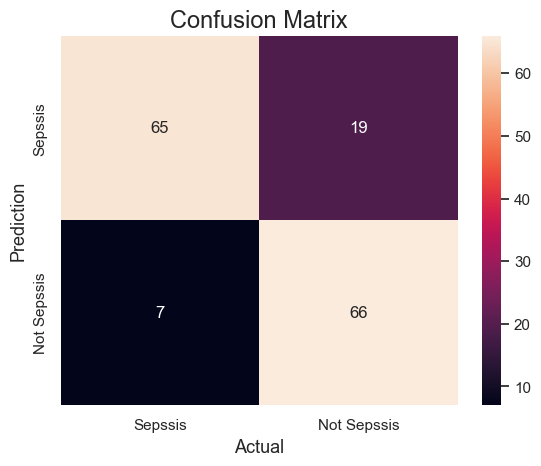

In [231]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Sepssis','Not Sepssis'],
            yticklabels=['Sepssis','Not Sepssis'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Model accuracy for train set: 1.000
Model accuracy for test set: 0.834

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        84
           1       0.78      0.90      0.84        73

    accuracy                           0.83       157
   macro avg       0.84      0.84      0.83       157
weighted avg       0.84      0.83      0.83       157


Confusion Matrix:
 [[65 19]
 [ 7 66]]

Accuracy Score:  0.834


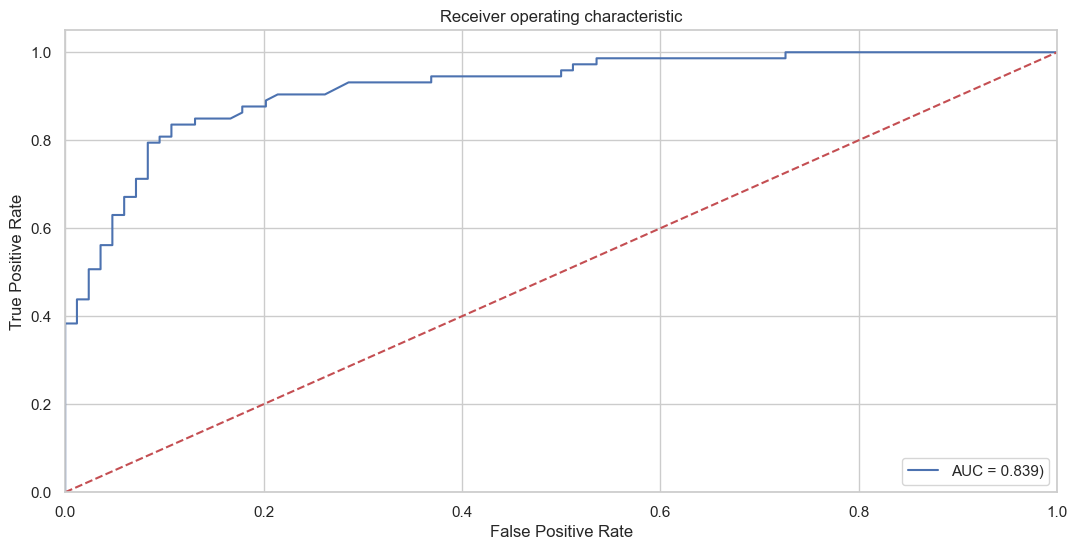

In [232]:
# learning curve 
model1 = train_and_plot(rf, X_train, y_train, X_test, y_test)

## Model Evaluation

**Summary**: There are several major problems in the dataset. 

* **Small dataset**: the number of data points in the dataset is only a few hundred even though I used some oversampling technique, which can easily lead to overfitting so that I have to choose a simple algorithm with regularization because I can't do too much feature engineering or sample more data.

* **Imbalanced dataset**: the number of each class in the dataset is imbalanced so that I have to deal with it using SMOTE Oversampling technique. The reason I used this method is that it will not copy and repeat data point like the Random Oversampling technique but creating data points in a synthetic and systematical way. Which will vastly decrease the chance of overfitting. 

**Metrics**:
* Prevent overfitting.
* High recall score.
* Simple algorithms.
* Regularization (L2)

Thus based on our evaluation metric, the scores of the models we tried are as below:

| Models      | Recall Score | F1-score| ROC AUC (%) | Precision |
|-------------|--------------------------|----------------------|-----|----|
| **1. Regularized Logistic Regression with Hyperparameter Tuning and SMOTE Oversampling** | 74, 78 | 77, 75 | 75.9 | 79, 72 |
| **2. Decision Tree with Hyperparameter Tuning and SMOTE Oversampling** | 73, 82 | 77, 77 | 77.4 | 82, 72 |
| **3. Bagging Decision Tree with Hyperparameter Tuning and SMOTE Oversampling** | 82, 89 | 86, 85 | 85.5 | 90, 81 |
| **4. Random Forest with Hyperparameter Tuning and SMOTE Oversampling** | 77, 89 | 83, 82 | 83.2 | 89, 77 |

Note: The first number is for class 0 and the second number (behind the comma) is for class 1. 

According to all the metrics and score, it can be seen that **Model 3** gives a better measures overall against others. 